<a href="https://colab.research.google.com/github/palit-ishan/Online_News_Prediction_Parallel_Processing/blob/main/EECE_5645_Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Online News Popularity Dataset - Regression Task


In [ ]:
!pip install pyspark
!pip install -q findspark
!pip install plotext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=d6dfc0dc3af8ef8f9b7e7a0605e72c194f7a3cc934bae5db3b622f992247338a
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 6.0 MB/s eta 0:00:00


In [ ]:
#Importing required libraries

In [ ]:
# Importing the necessary packages
import numpy as np # linear algebra
import pandas as pd 
import numpy as np
import os
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn import linear_model, metrics
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image


Reading Raw Data

In [ ]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv('OnlineNewsPopularity.csv')

Checking the shape of the dataset

In [ ]:
raw_df.shape

(39644, 61)

Data Exploration - Printing the data schema in tree format

In [ ]:
raw_df.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385         4.0              2.0        1.0   
1                   0.791946         3.0              1.0        1.0   
2                   0.663866         3.0              1.0        1.0   
3                   0.665635         9.0              0.0        1.0   
4                   0.540890        19.0             19.0       20.0   

    num_videos   average_token_length   num_keywords  \
0          0.0               4.680365            5.0   
1          0.0               4.913725            4.0   
2          0.0               4.393365            6.0   
3          0.0               4.404896            7.0   
4          0.0               4.682836            7.0   

    data_channel_is_lifestyle   data_channel_is_entertainment  \
0                         0.0                             1.0   
1                         0.0                             0.0   
2                         0.0                             0.0   
3                         0.0                             1.0   
4                         0.0                             0.0   

    data_channel_is_bus   data_channel_is_socmed   data_channel_is_tech  \
0                   0.0                      0.0                    0.0   
1                   1.0                      0.0                    0.0   
2                   1.0                      0.0                    0.0   
3                   0.0                      0.0                    0.0   
4                   0.0                      0.0                    1.0   

    data_channel_is_world   kw_min_min   kw_max_min   kw_avg_min   kw_min_max  \
0                     0.0          0.0          0.0          0.0          0.0   
1                     0.0          0.0          0.0          0.0          0.0   
2                     0.0          0.0          0.0          0.0          0.0   
3                     0.0          0.0          0.0          0.0          0.0   
4                     0.0          0.0          0.0          0.0          0.0   

    kw_max_max   kw_avg_max   kw_min_avg   kw_max_avg   kw_avg_avg  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

    self_reference_min_shares   self_reference_max_shares  \
0                       496.0                       496.0   
1                         0.0                         0.0   
2                       918.0                       918.0   
3                         0.0                         0.0   
4                       545.0                     16000.0   

    self_reference_avg_sharess   weekday_is_monday   weekday_is_tuesday  \
0                   496.000000                 1.0                  0.0   
1                     0.000000                 1.0                  0.0   
2                   918.000000                 1.0         

## Null Value Checks

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [ ]:
#checking the Number of Null values
missing_data_percent=round(100 *(raw_df.isnull().sum()/len(raw_df.index)),2)
missing_data_percent

url                               0.0
 timedelta                        0.0
 n_tokens_title                   0.0
 n_tokens_content                 0.0
 n_unique_tokens                  0.0
 n_non_stop_words                 0.0
 n_non_stop_unique_tokens         0.0
 num_hrefs                        0.0
 num_self_hrefs                   0.0
 num_imgs                         0.0
 num_videos                       0.0
 average_token_length             0.0
 num_keywords                     0.0
 data_channel_is_lifestyle        0.0
 data_channel_is_entertainment    0.0
 data_channel_is_bus              0.0
 data_channel_is_socmed           0.0
 data_channel_is_tech             0.0
 data_channel_is_world            0.0
 kw_min_min                       0.0
 kw_max_min                       0.0
 kw_avg_min                       0.0
 kw_min_max                       0.0
 kw_max_max                       0.0
 kw_avg_max                       0.0
 kw_min_avg                       0.0
 kw_max_avg 

##Data Cleaning

In [ ]:
# To check each variable datatype 
raw_df.info(verbose=1,null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [ ]:
# checking the shape of the data again 
raw_df.shape

(39644, 61)

In [ ]:
# Checking if there are columns with one unique value since it won't affect our analysis
raw_df.nunique(dropna=True)

url                               39644
 timedelta                          724
 n_tokens_title                      20
 n_tokens_content                  2406
 n_unique_tokens                  27281
 n_non_stop_words                  1451
 n_non_stop_unique_tokens         22930
 num_hrefs                          133
 num_self_hrefs                      59
 num_imgs                            91
 num_videos                          53
 average_token_length             30136
 num_keywords                        10
 data_channel_is_lifestyle            2
 data_channel_is_entertainment        2
 data_channel_is_bus                  2
 data_channel_is_socmed               2
 data_channel_is_tech                 2
 data_channel_is_world                2
 kw_min_min                          26
 kw_max_min                        1076
 kw_avg_min                       17003
 kw_min_max                        1021
 kw_max_max                          35
 kw_avg_max                       30834


In above case we can see there are no columns with only 1 unique value.
Also, no imputation is needed since data doesnt have null values.

In [ ]:
# Now we will split data into 2 parts - Test Set (15%) and Training Set (85%) of randomly sampled data before we begin the EDA
from sklearn.model_selection import train_test_split
train, test = train_test_split(raw_df, test_size=0.15, random_state=42, shuffle=True)


In [ ]:
train.shape

(33697, 61)

## Exploratory Data Analysis


In [ ]:
# We will not touch the test day after this so as to prevent information leakage.
train.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [ ]:
# Now we will explore the target variable
train[' shares'].describe()

count     33697.000000
mean       3391.668309
std       11539.059355
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

The range of target variable is very large - so we will perform log transform and then check the distribution

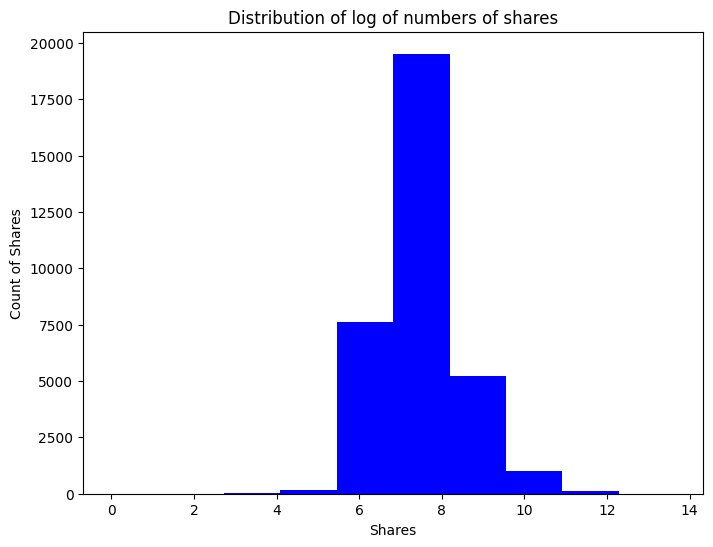

In [ ]:
# choose features and target
X_train = train.iloc[:,2:60] # select all columns except URL and TARGET
y_train = train[" shares"].values.ravel() #target:number of shares
plt.figure(figsize= (8,6))
plt.hist(np.log(y_train),color="blue")
plt.xlabel("Shares")
plt.ylabel("Count of Shares")
plt.title("Distribution of log of numbers of shares")
plt.show()

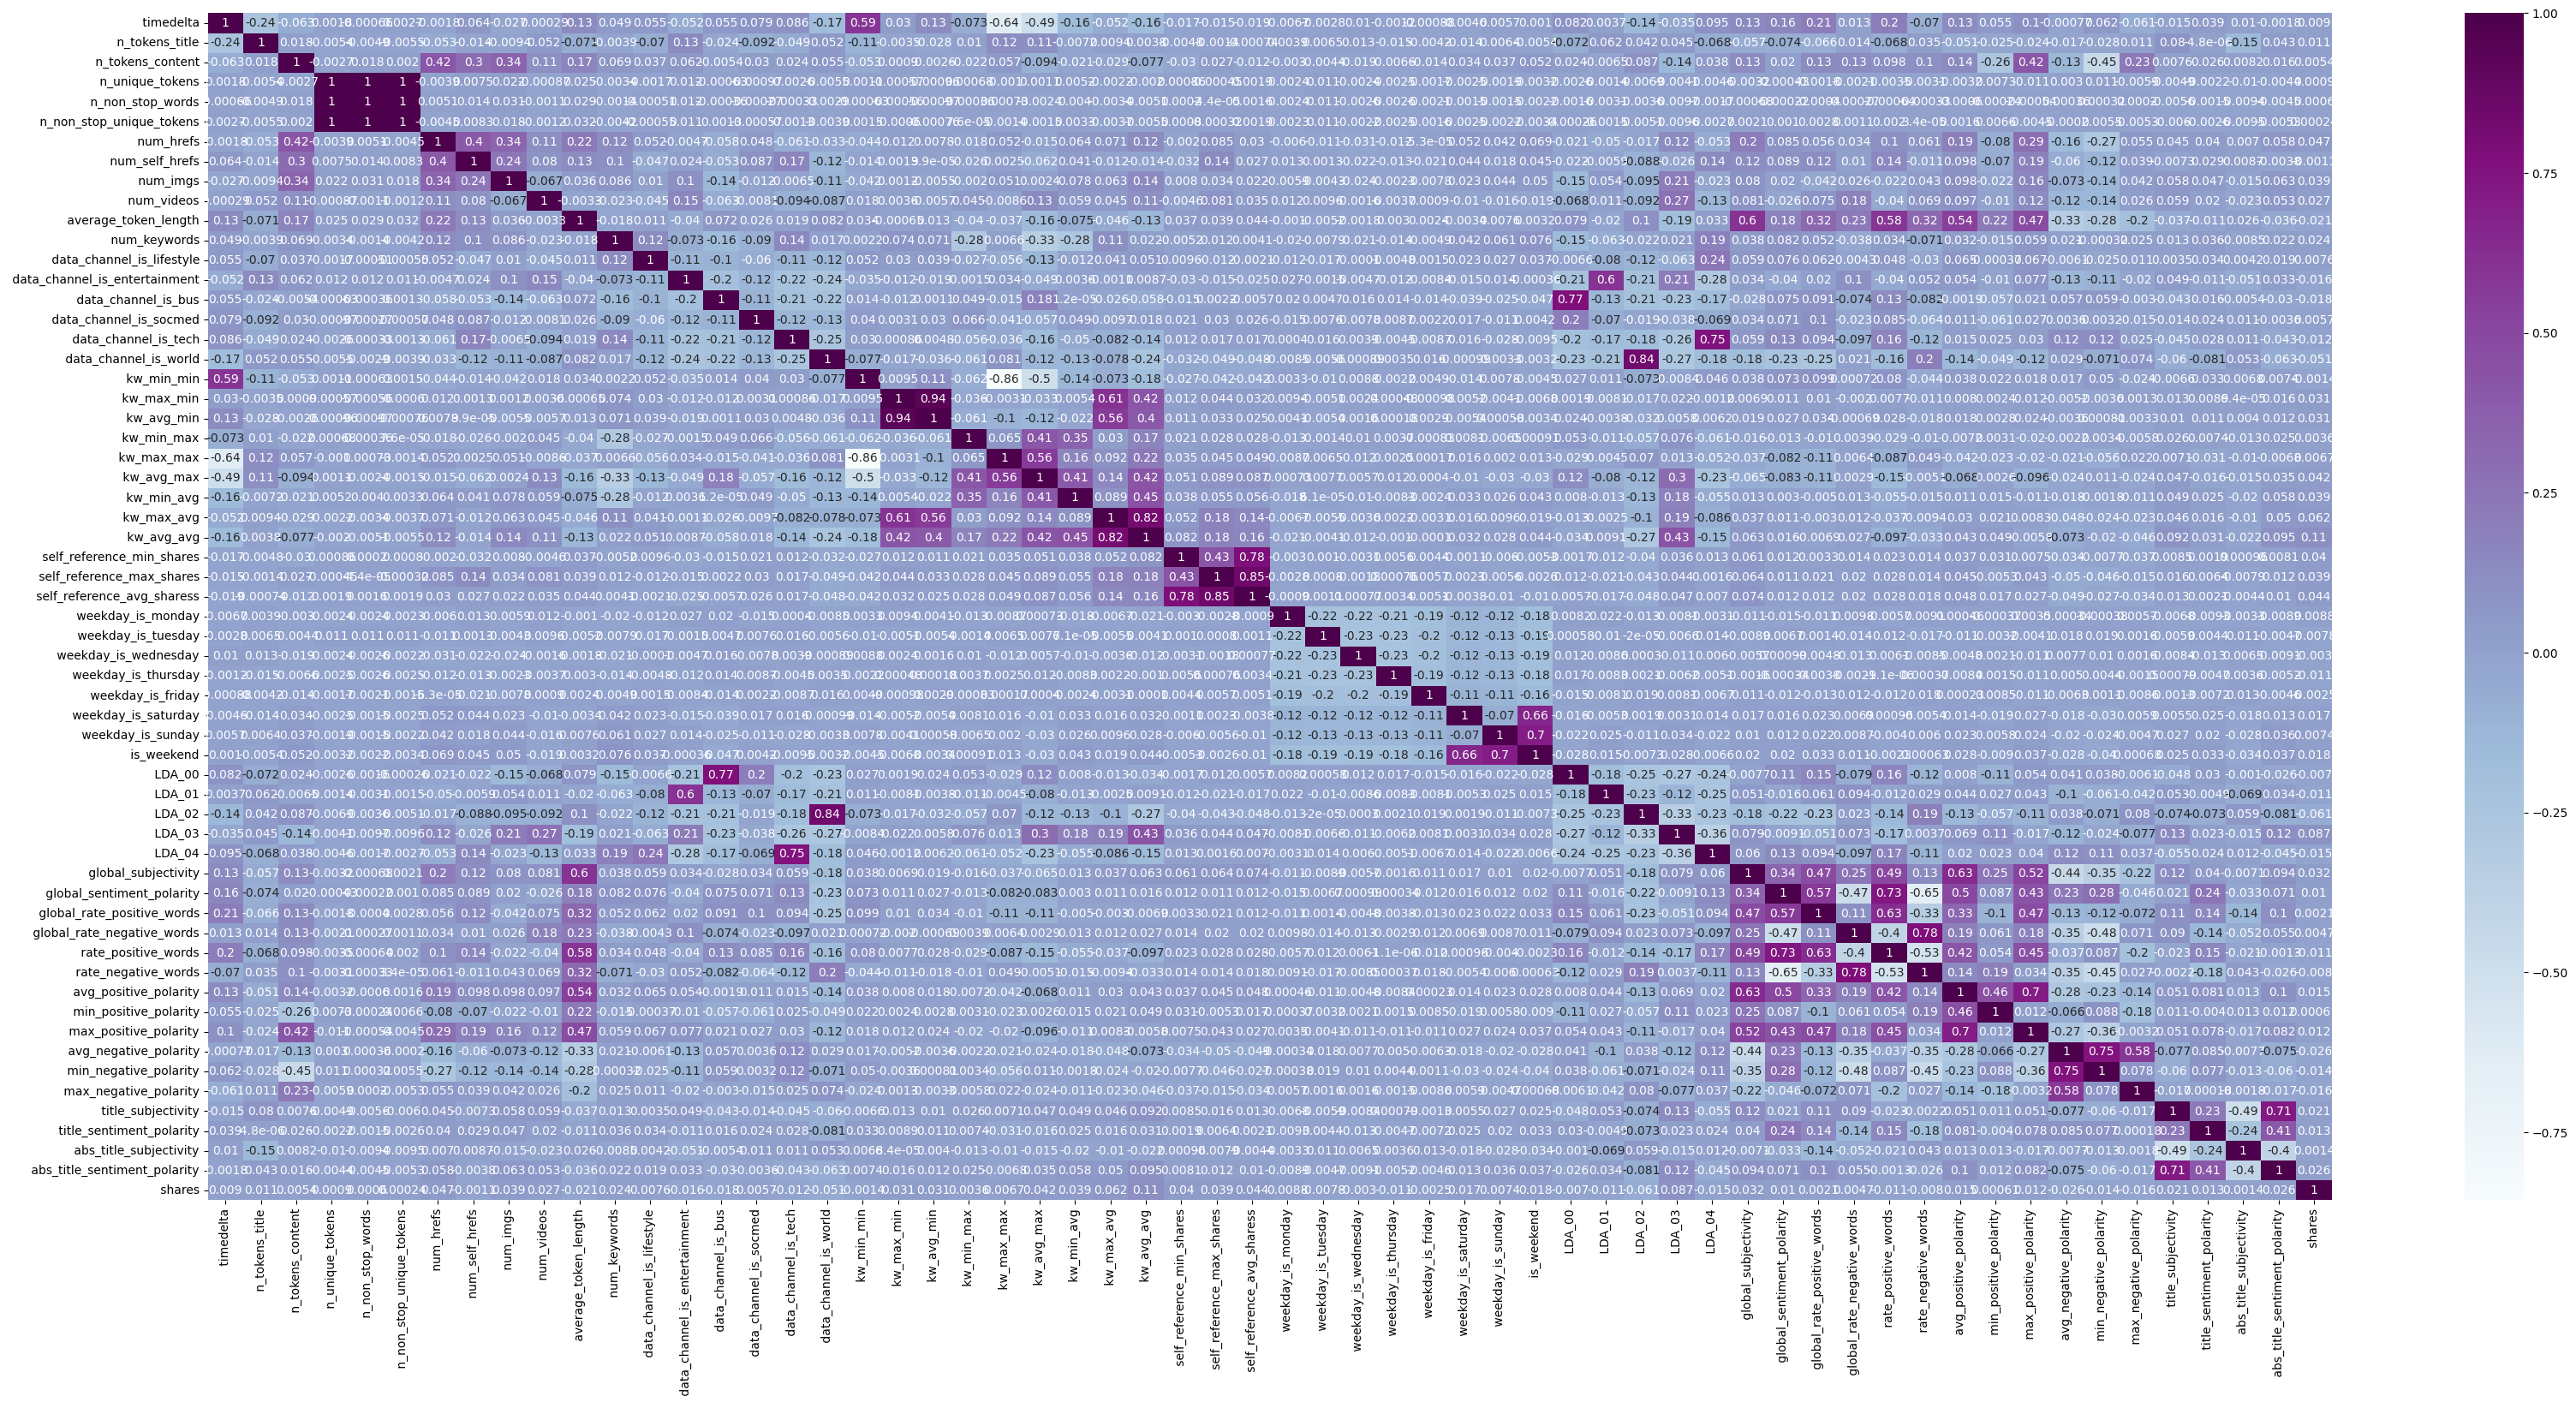

In [ ]:
# plot the feature correlation heatmap
plt.figure(figsize=(40,18))
sns.heatmap(train.corr(),cmap="BuPu",annot=True) 
plt.show()

Multi-colinearlity is less as can be seen from the above Heatmap. Hence, we do not need to drop any features now.

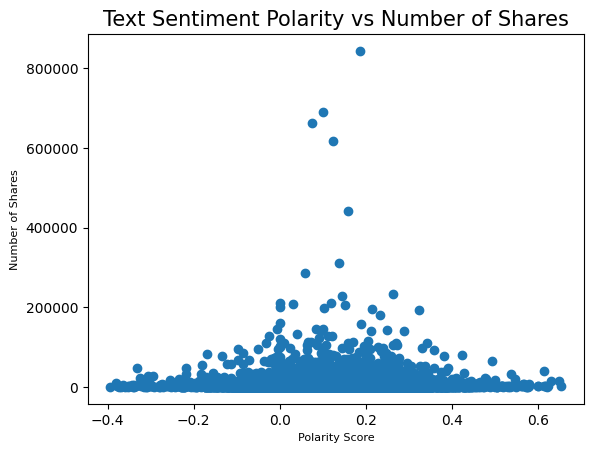

In [ ]:
# text sentiment polarity vs number of shares
plt.scatter(train[" global_sentiment_polarity"], train[" shares"])
plt.title("Text Sentiment Polarity vs Number of Shares", size=15)
plt.xlabel("Polarity Score", size=8)
plt.ylabel("Number of Shares", size=8)
plt.show()

When polarity score is in the range 0.0 - 0.6 we see more number of shares

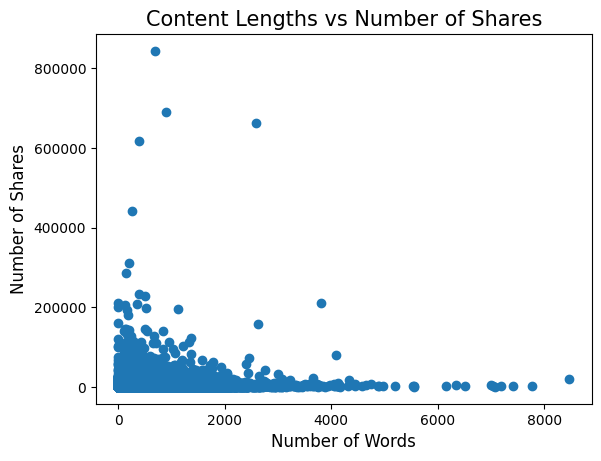

In [ ]:
# number of words in the content vs number of shares
plt.scatter(train[" n_tokens_content"], train[" shares"])
plt.title("Content Lengths vs Number of Shares", size=15)
plt.xlabel("Number of Words", size=12)
plt.ylabel("Number of Shares", size=12)
plt.show()

When number of words is in the range 1000-2000 we see more number of shares

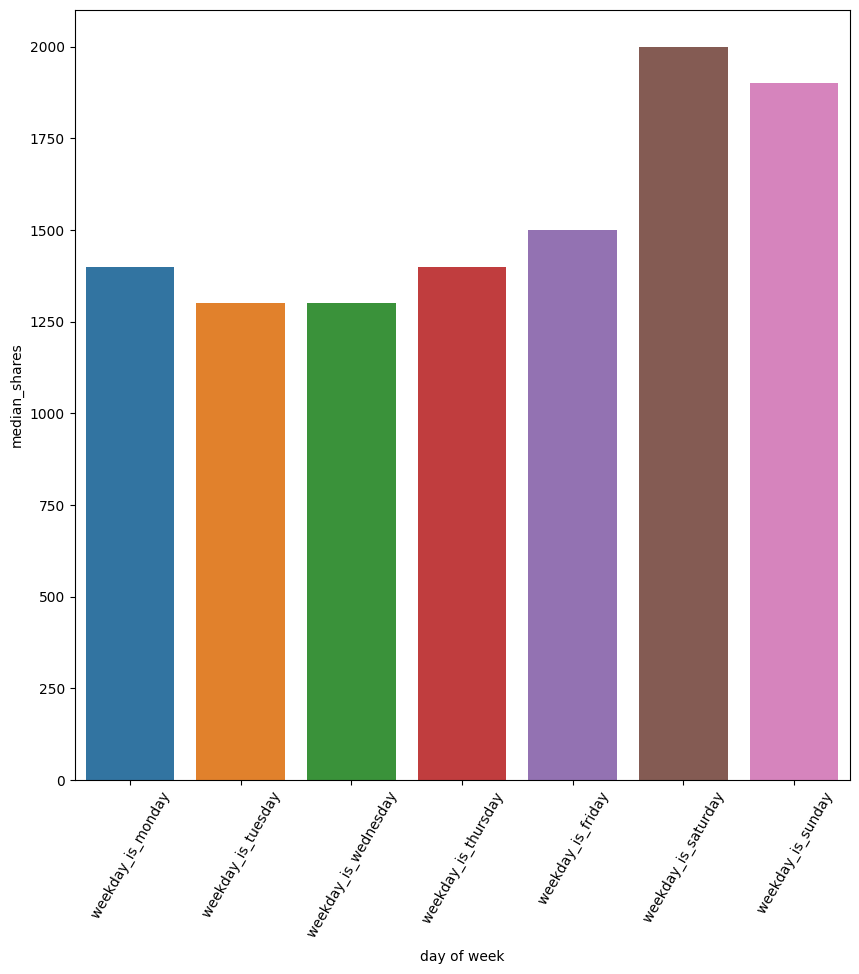

In [ ]:
#Days of the week analysis
plt.figure(figsize= (10,10))
shares = []
cols = [' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday']
for d in cols:
    shares.append(train[train[d] == 1][' shares'].median())

ax = sns.barplot(x = cols, y = shares)
ax.set(xlabel = 'day of week', ylabel = 'median_shares')
plt.xticks(rotation = 60)
plt.show()


Saturday has maximum number of shares

Analysis of Data Channels -

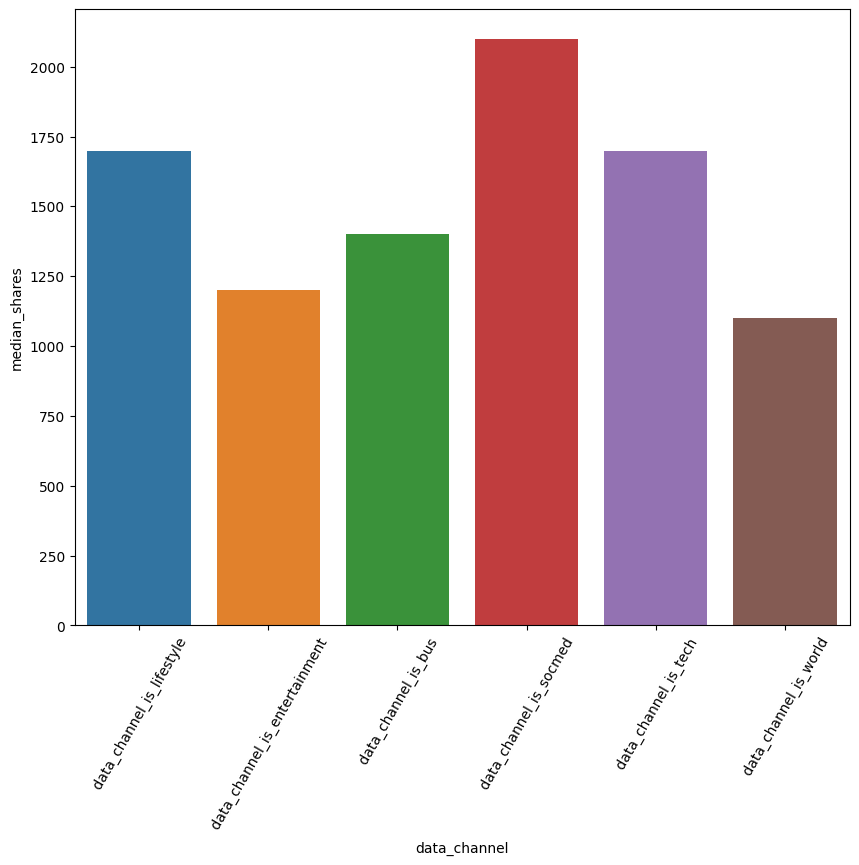

In [ ]:
plt.figure(figsize= (10,8))
channel = []
cols = [' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world']
for d in cols:
    channel.append(train[train[d]==1][' shares'].median())

ax = sns.barplot(x = cols, y = channel)
ax.set(xlabel = 'data_channel', ylabel = 'median_shares')
plt.xticks(rotation = 60)
plt.show()

Max shares is when data channel is socmedia (Social Media) 

## Outlier Analysis


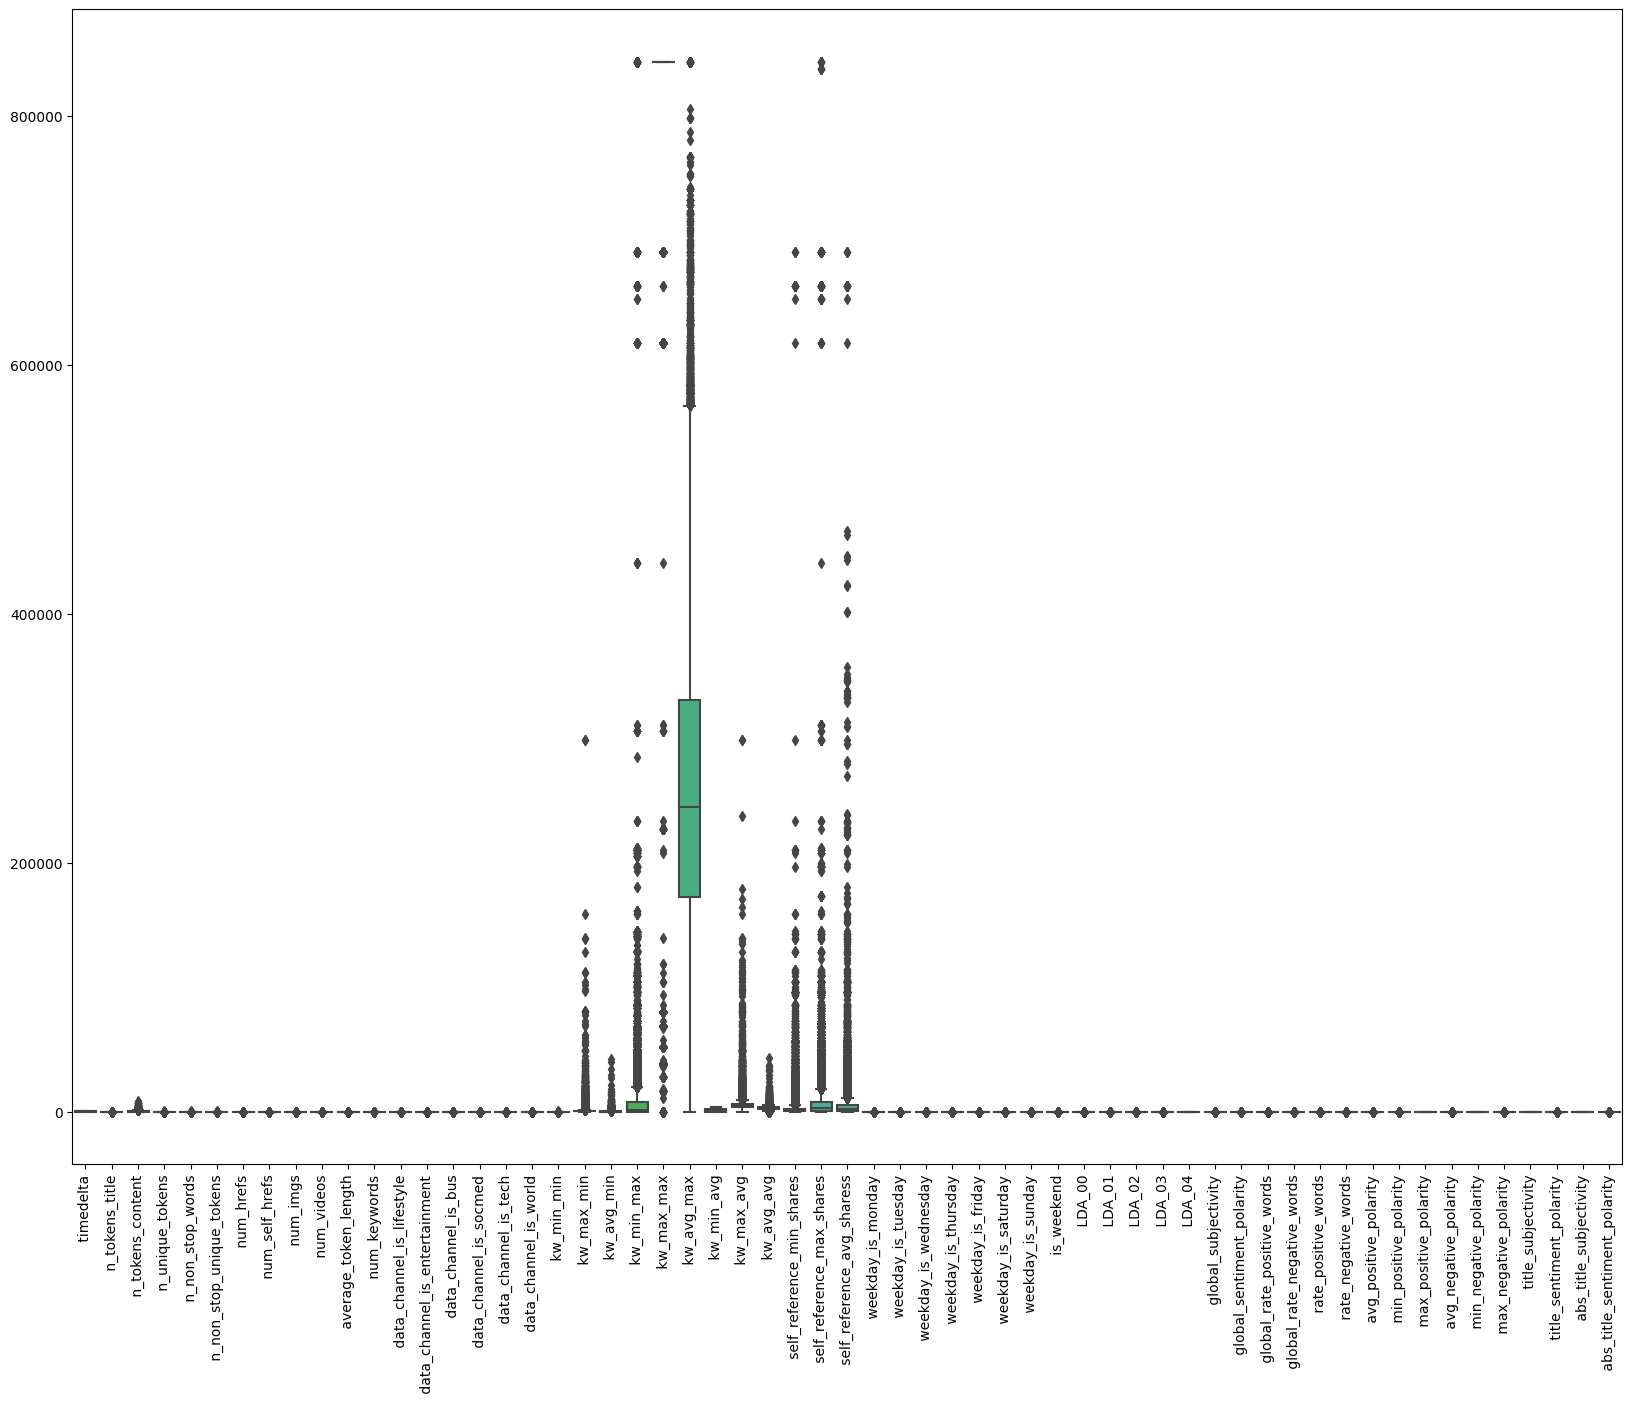

In [ ]:
#checking for outliers
plt.figure(figsize=(20,15))
plt.xticks(rotation =90)
sns.boxplot(data = train.iloc[:,:-1])
plt.show()

There are many outliers in the data, so we will remove them.
Converting negative values to positive values.


In [ ]:
X_train = train.iloc[:,2:-1]
X_test = test.iloc[:,2:-1]
negcols= X_train.columns[(X_train<=0).any()]
negcols
for i in negcols:
    m=X_train[i].min()
    name=i 
    print(name)
    X_train[name]=((X_train[i]+1)-m)
    X_test[name] = ((X_test[i]+1)-m)

 n_tokens_content
 n_unique_tokens
 n_non_stop_words
 n_non_stop_unique_tokens
 num_hrefs
 num_self_hrefs
 num_imgs
 num_videos
 average_token_length
 data_channel_is_lifestyle
 data_channel_is_entertainment
 data_channel_is_bus
 data_channel_is_socmed
 data_channel_is_tech
 data_channel_is_world
 kw_min_min
 kw_max_min
 kw_avg_min
 kw_min_max
 kw_max_max
 kw_avg_max
 kw_min_avg
 kw_max_avg
 kw_avg_avg
 self_reference_min_shares
 self_reference_max_shares
 self_reference_avg_sharess
 weekday_is_monday
 weekday_is_tuesday
 weekday_is_wednesday
 weekday_is_thursday
 weekday_is_friday
 weekday_is_saturday
 weekday_is_sunday
 is_weekend
 LDA_00
 LDA_01
 LDA_02
 LDA_03
 LDA_04
 global_subjectivity
 global_sentiment_polarity
 global_rate_positive_words
 global_rate_negative_words
 rate_positive_words
 rate_negative_words
 avg_positive_polarity
 min_positive_polarity
 max_positive_polarity
 avg_negative_polarity
 min_negative_polarity
 max_negative_polarity
 title_subjectivity
 title_sentimen

In [ ]:
# Checking negative columns
negcols=X_train.columns[(X_train<=0).any()]
negcols

Index([], dtype='object')

There are no more negative columns

In [ ]:
# log transform with constant 10000 for real numbers
X_train = np.log((10000 + X_train))
X_test = np.log((10000 + X_test))

In [ ]:
# Treating Outlier
for col in X_train.columns:
    percentiles = X_train[col].quantile([0.01, 0.99]).values
    X_train[col][X_train[col] <= percentiles[0]] = percentiles[0]
    X_train[col][X_train[col] >= percentiles[1]] = percentiles[1]

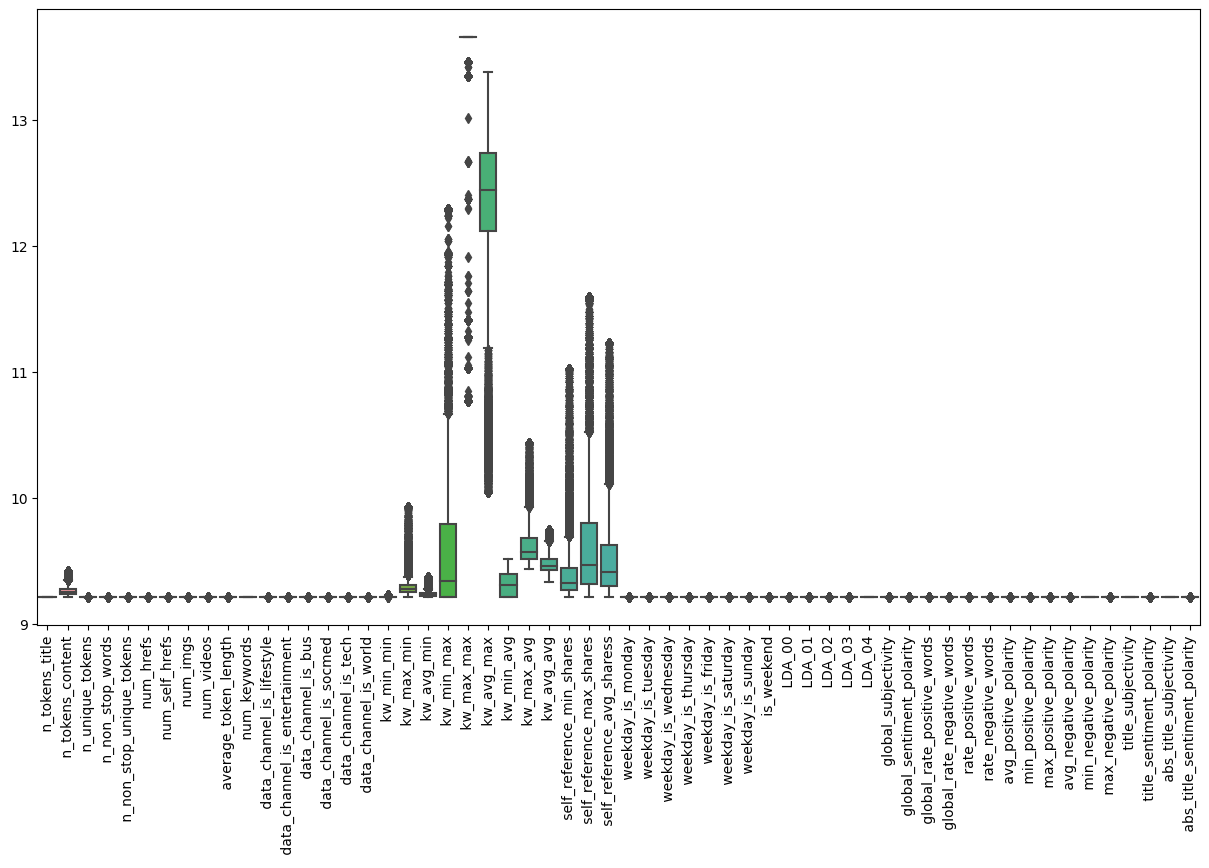

In [ ]:
#checking for outliers again
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.boxplot(data = X_train)
plt.show()

So even after capping the values of columns to positive also few columns are not showhing good results so dropping them



In [ ]:
cols = [' kw_min_min',
' kw_max_min',
' kw_avg_min',
' kw_min_max',
' kw_max_max',
' kw_avg_max',
' kw_min_avg',
' kw_max_avg',
' kw_avg_avg',
' data_channel_is_world',
 ' self_reference_min_shares',
 ' self_reference_max_shares',
 ' data_channel_is_tech',
 ' data_channel_is_socmed',
' data_channel_is_lifestyle',
' data_channel_is_entertainment',
' data_channel_is_bus',
' data_channel_is_socmed',
' data_channel_is_tech',
' data_channel_is_world',
 ' num_keywords',
' average_token_length',
' num_videos',
' num_hrefs',
' num_self_hrefs',
' num_imgs',
' num_videos',
' n_non_stop_unique_tokens',
 ' n_non_stop_words',
 ' n_unique_tokens',
 ' n_tokens_content']
X_train = X_train.drop(cols, axis=1)
X_test = X_test.drop(cols,axis=1)

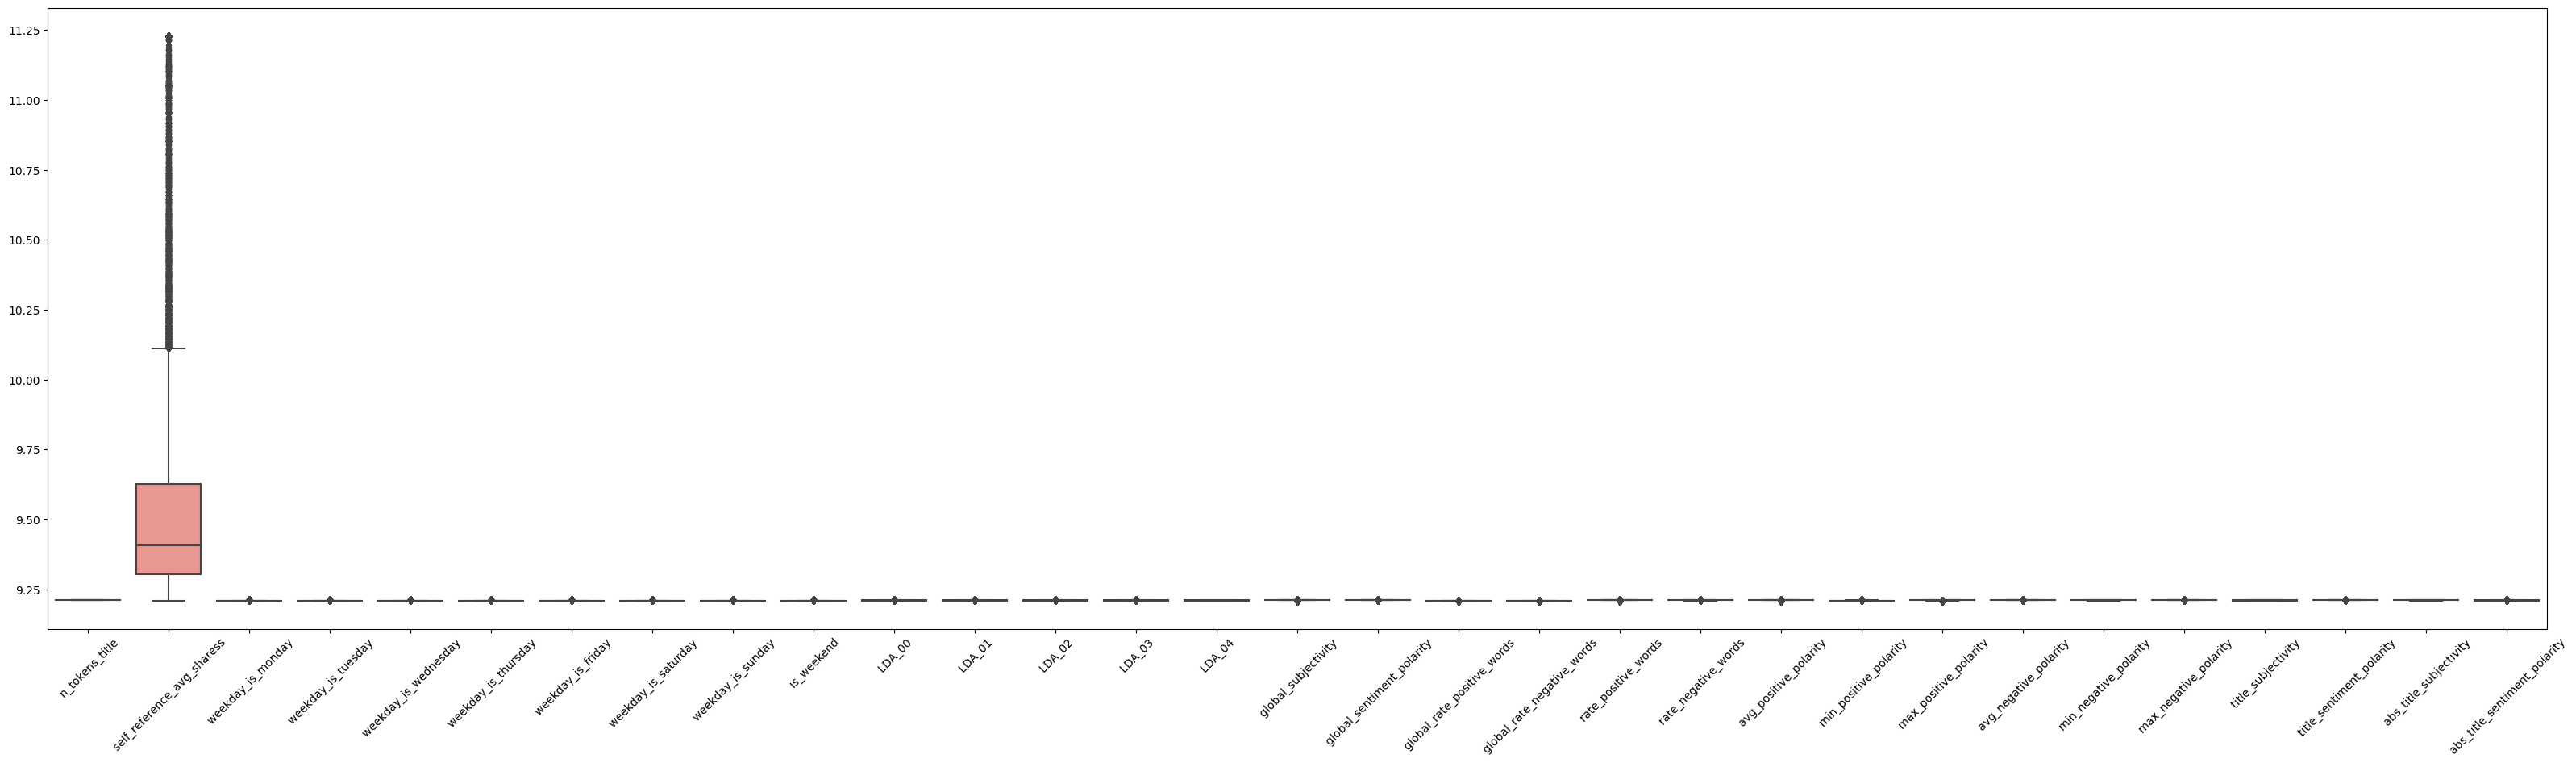

In [ ]:
#checking for outliers again
plt.figure(figsize=(40,10))
plt.xticks(rotation=45)
sns.boxplot(data = X_train)
plt.show()

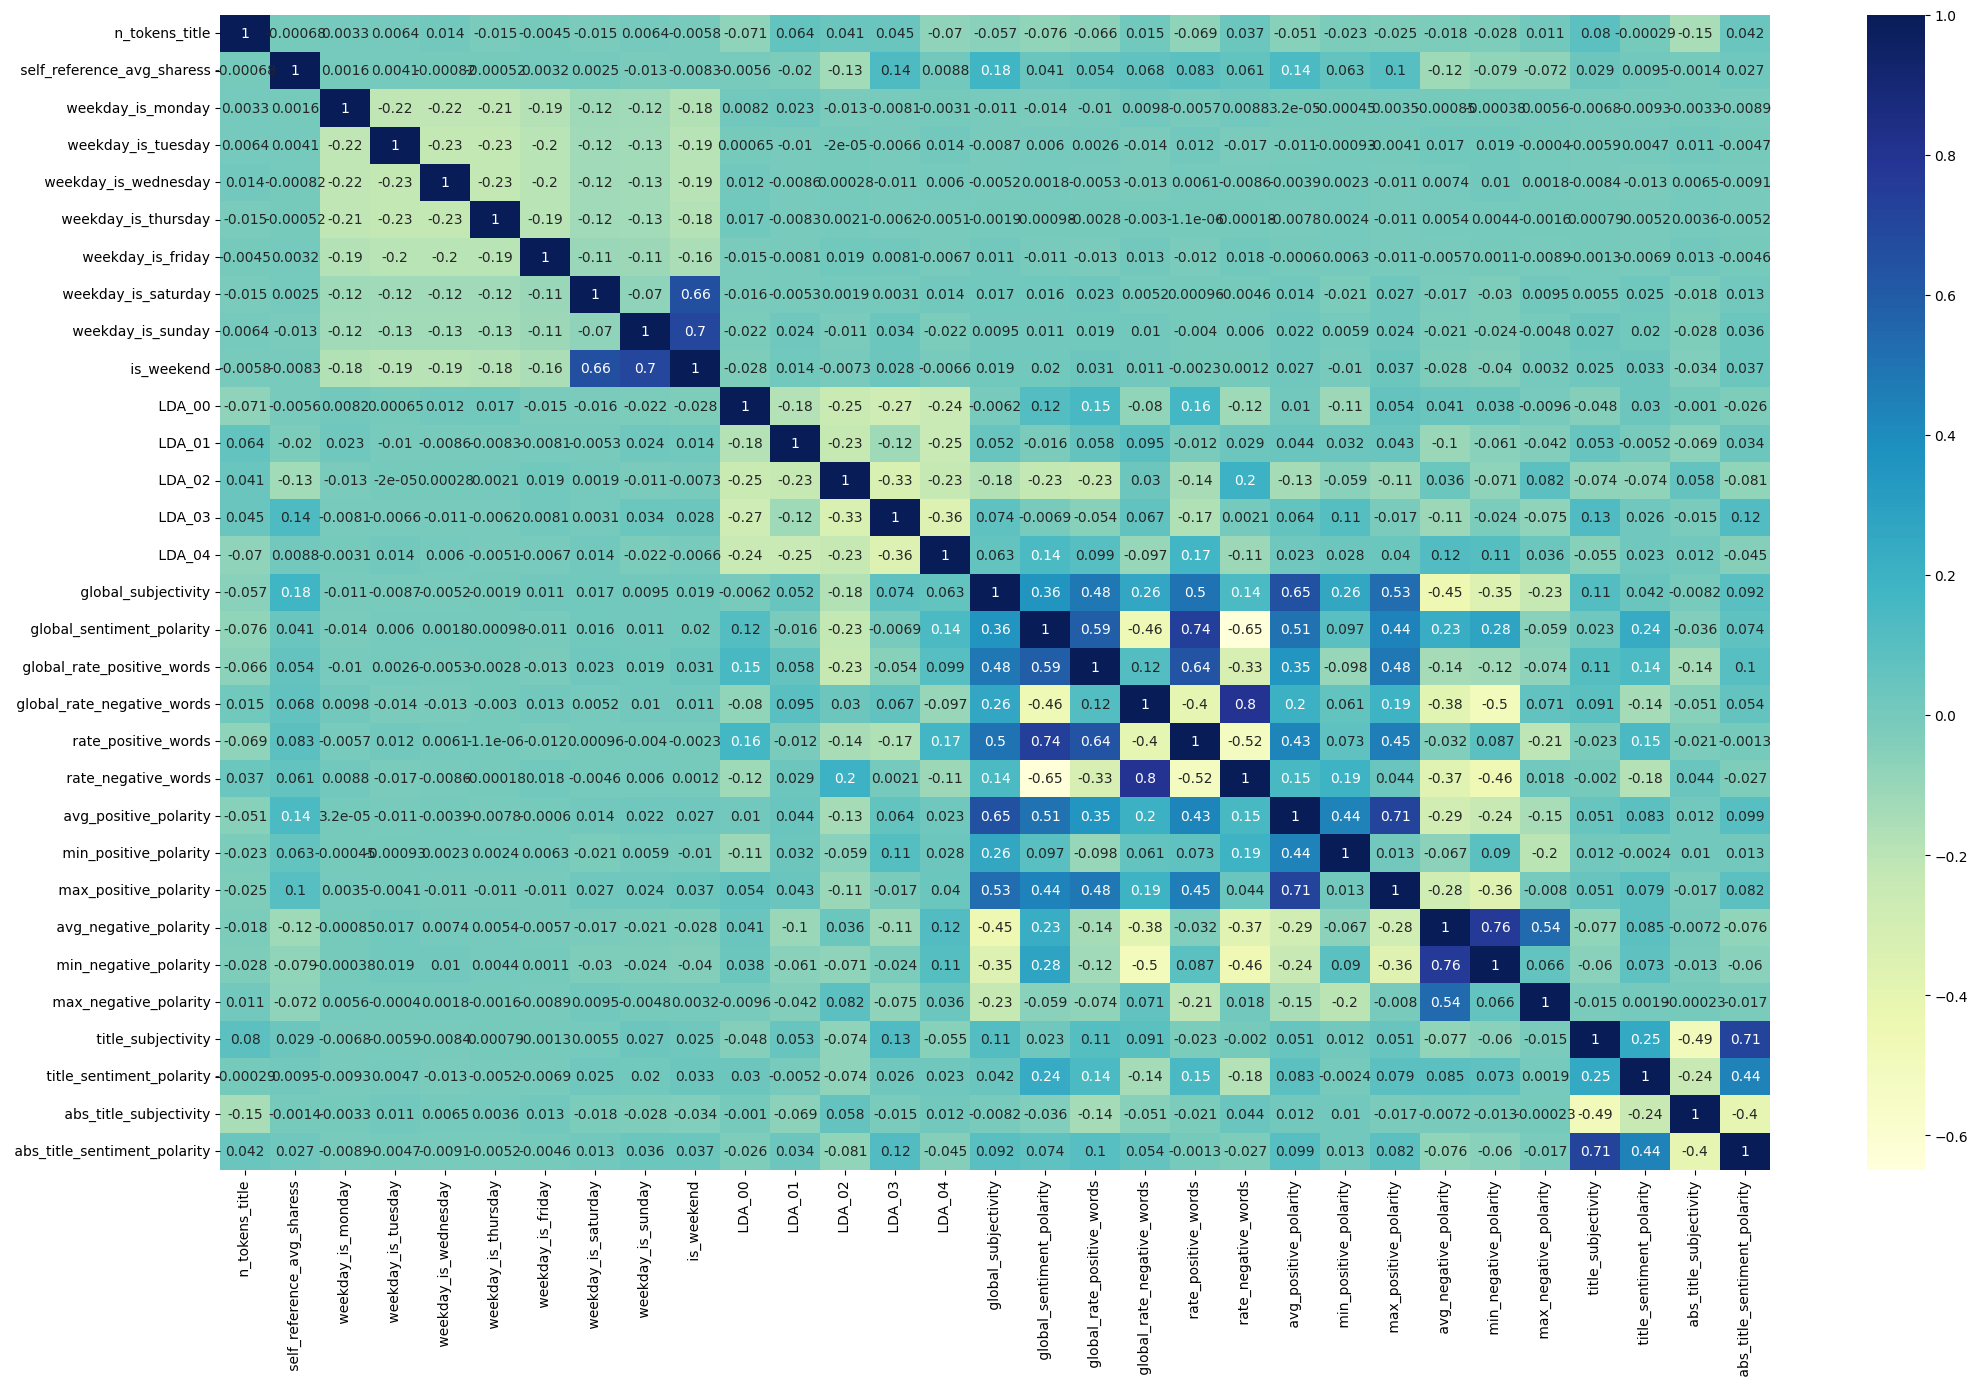

In [ ]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(X_train.corr(),cmap="YlGnBu", annot=True)
plt.show()

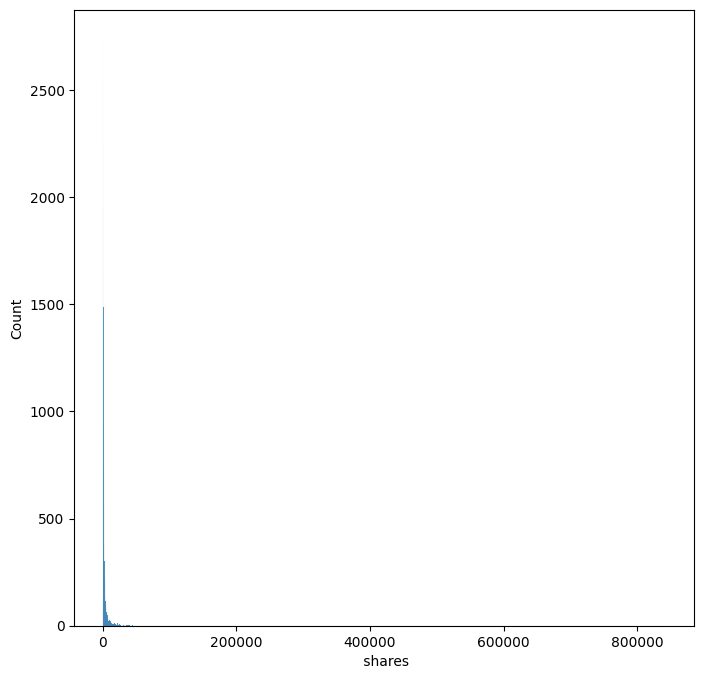

In [ ]:
# Distribution for the target Variable
plt.figure(figsize=(8,8))
sns.histplot(train.iloc[:,-1])
plt.show()

## Log Value Transformations

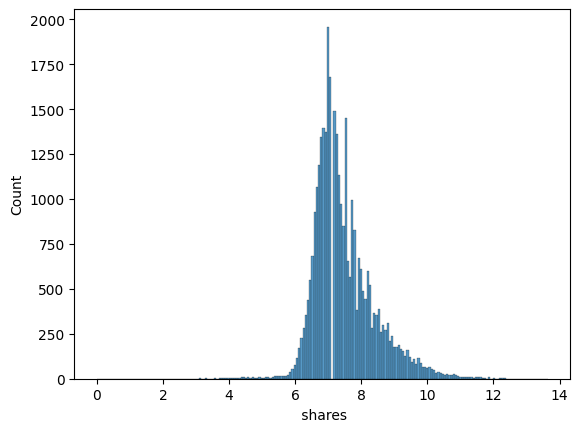

In [ ]:
y_train = np.log(train.iloc[:,-1])
y_test = np.log(test.iloc[:,-1])
sns.histplot(y_train)
#sns.histplot(np.log(y))
plt.show()

## Scaling - Parallel vs Serial

### Parallel Scaling

In [ ]:
import random
import sys
import argparse
import findspark
findspark.init()
from time import time
from pyspark import SparkContext
from pyspark import SparkConf
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

In [ ]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [ ]:
train_x_pyspark = sqlContext.createDataFrame(X_train)

In [ ]:
columns_names = list(X_train.columns)
from pyspark.ml.feature import StandardScaler as pyspark_scale
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler().setInputCols(columns_names[:]).setOutputCol("features")
transformed_train_X = assembler.transform(train_x_pyspark)

In [ ]:
%%time
scaler_pyspark = pyspark_scale(withMean=True, withStd=True,inputCol="features", outputCol="scaledFeatures")
scaler_pyspark_model = scaler_pyspark.fit(transformed_train_X.select("features"))
train_df_scaled_pyspark_X = scaler_pyspark_model.transform(transformed_train_X)

CPU times: user 56.4 ms, sys: 6.37 ms, total: 62.7 ms
Wall time: 6.64 s


### Serial Scaling

In [ ]:
%%time
scaler = StandardScaler(with_mean=True, with_std=True)
X_train[:] = scaler.fit_transform(X_train)
X_test[:] = scaler.transform(X_test)

CPU times: user 27.4 ms, sys: 1.97 ms, total: 29.4 ms
Wall time: 29.5 ms


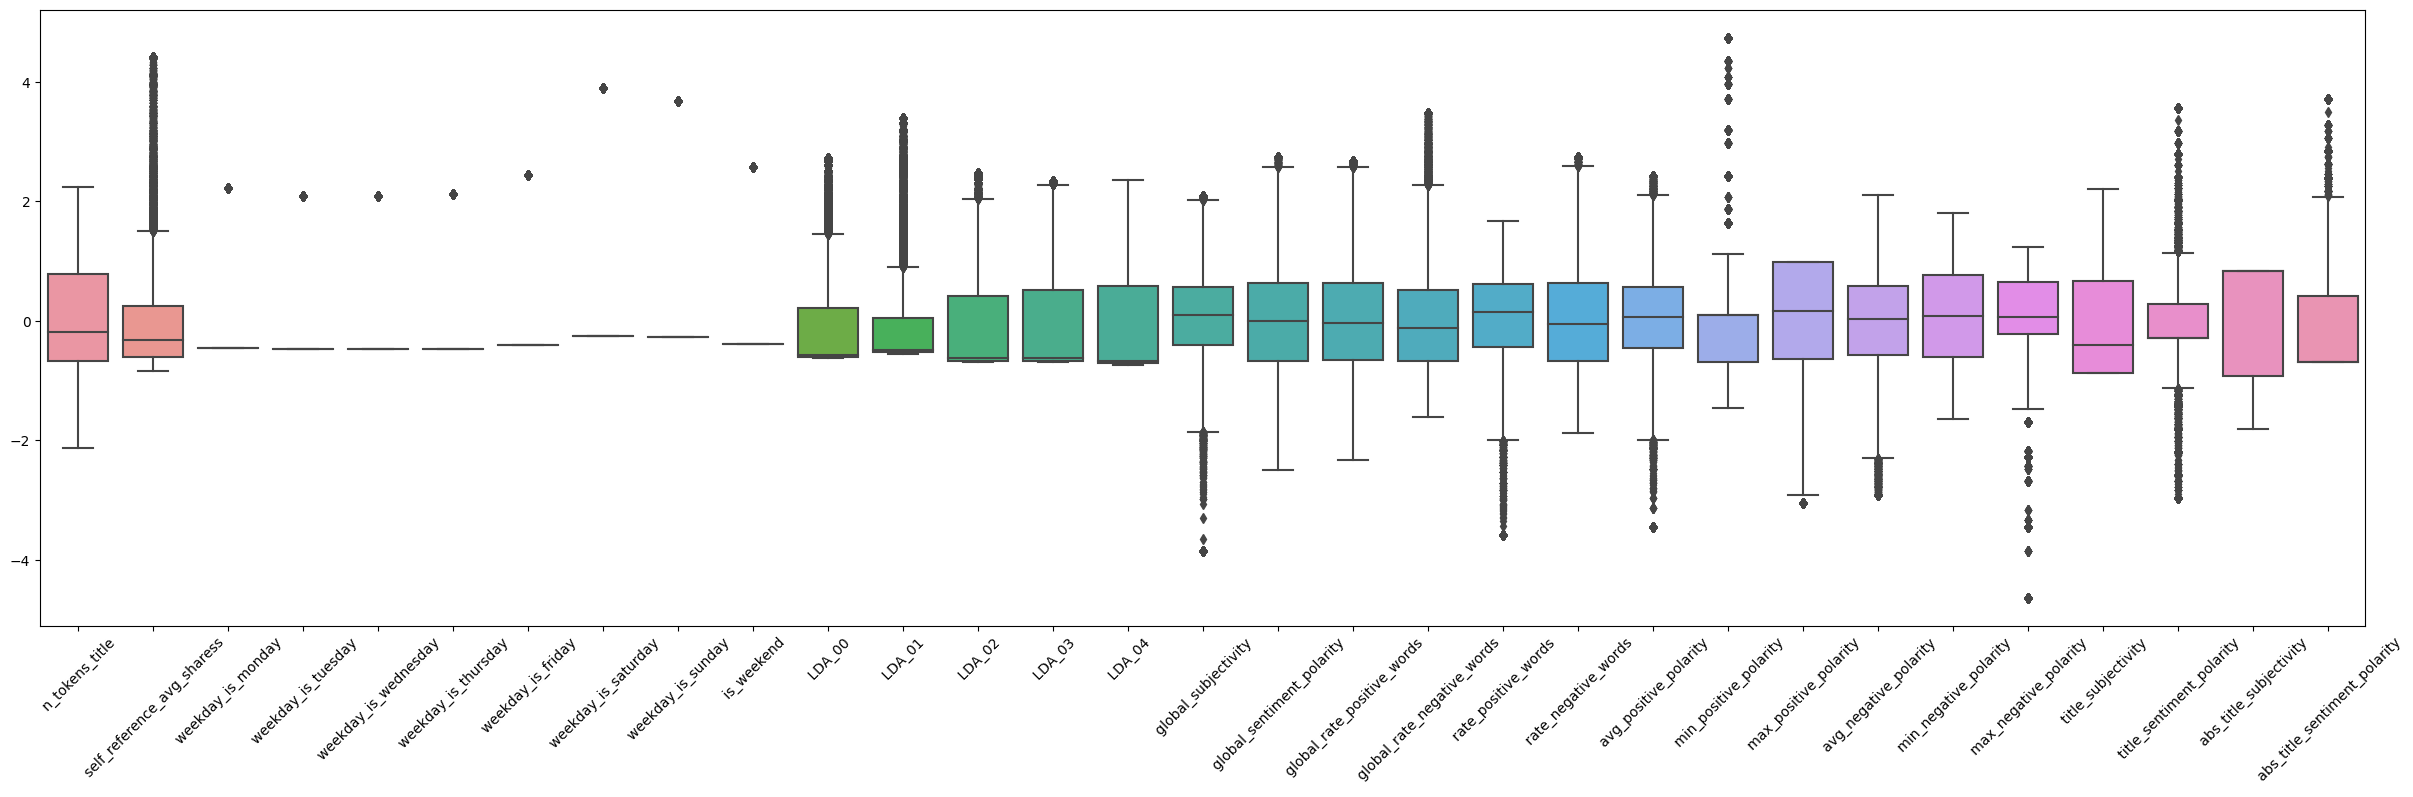

In [ ]:
plt.figure(figsize=(30,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train)
plt.show()

## Baseline Modelling - Sequential Processing

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# created a function to get all the valuable metrics
def regression_results(X_test,y_true,model):

    # Regression metrics
    y_pred = model.predict(X_test)
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred) 
    mse = metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [ ]:
%%time
reg = SGDRegressor(max_iter=100, alpha=0.0, learning_rate='invscaling', 
                   eta0=0.001, penalty = None, fit_intercept = True,tol = 0.001)
reg_model = reg.fit(X_train, y_train)


CPU times: user 85.5 ms, sys: 20 µs, total: 85.5 ms
Wall time: 85.5 ms


In [ ]:
%%time
y_pred = reg_model.predict(X_test)

CPU times: user 4.63 ms, sys: 0 ns, total: 4.63 ms
Wall time: 4.49 ms


In [ ]:
regression_results(X_test,y_test,reg_model)

explained_variance:  0.0853
MAE:  0.6686
MSE:  0.7932
RMSE:  0.8906


##Sequential Processing - Models

###Linear Regression with SGD - L1 Regularization

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
%%time
reg = SGDRegressor(max_iter=100, alpha=0.0001, learning_rate='invscaling', 
                   eta0=0.001, penalty = 'l1',fit_intercept = True,tol = 0.001)
reg_model = reg.fit(X_train, y_train)

CPU times: user 144 ms, sys: 62.4 ms, total: 206 ms
Wall time: 147 ms


In [ ]:
%%time
y_pred = reg_model.predict(X_test)

CPU times: user 5.07 ms, sys: 3.07 ms, total: 8.14 ms
Wall time: 8.69 ms


In [ ]:
regression_results(X_test,y_test,reg_model)

explained_variance:  0.0854
MAE:  0.6689
MSE:  0.7932
RMSE:  0.8906


###Linear Regression with SGD - L2 Regularization

In [ ]:
%%time

reg = SGDRegressor(max_iter=100, alpha=0.0001, learning_rate='invscaling', 
                   eta0=0.001,penalty = 'l2',fit_intercept = True,tol = 0.001)
reg_model = reg.fit(X_train, y_train)

CPU times: user 138 ms, sys: 28.8 ms, total: 167 ms
Wall time: 184 ms


In [ ]:
%%time
y_pred = reg_model.predict(X_test)

CPU times: user 5.27 ms, sys: 3.03 ms, total: 8.3 ms
Wall time: 8.59 ms


In [ ]:
regression_results(X_test,y_test,reg_model)

explained_variance:  0.0852
MAE:  0.6692
MSE:  0.7933
RMSE:  0.8907


###Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
%%time
reg = RandomForestRegressor(n_estimators = 25,max_features = "auto", random_state=42,max_depth = 7)
reg.fit(X_train, y_train)

CPU times: user 8.04 s, sys: 39.2 ms, total: 8.08 s
Wall time: 8.18 s


RandomForestRegressor(max_depth=7, max_features='auto', n_estimators=25,
                      random_state=42)

In [ ]:
%%time
y_pred = reg.predict(X_test)

CPU times: user 15.8 ms, sys: 0 ns, total: 15.8 ms
Wall time: 16.4 ms


In [ ]:
regression_results(X_test,y_test,reg)

explained_variance:  0.098
MAE:  0.6659
MSE:  0.7822
RMSE:  0.8844


###Gradient Boosting Regressor

In [ ]:
%%time
reg = GradientBoostingRegressor(random_state=42)
reg.fit(X_train, y_train)

CPU times: user 21.1 s, sys: 23.6 ms, total: 21.1 s
Wall time: 21.2 s


GradientBoostingRegressor(random_state=42)

In [ ]:
%%time
y_pred = reg.predict(X_test)

CPU times: user 16.3 ms, sys: 0 ns, total: 16.3 ms
Wall time: 25.6 ms


In [ ]:
regression_results(X_test,y_test,reg)

explained_variance:  0.1079
MAE:  0.6592
MSE:  0.7736
RMSE:  0.8796


## Parallel Processing - Data Preparation


In [ ]:
train_df_x = sqlContext.createDataFrame(X_train)
train_df_y = sqlContext.createDataFrame(pd.DataFrame(y_train))
test_df_x = sqlContext.createDataFrame(X_test)
test_df_y = sqlContext.createDataFrame(pd.DataFrame(y_test))

In [ ]:
from pyspark.ml.feature import VectorAssembler
columns_names = train_df_x.columns
assembler = VectorAssembler().setInputCols(columns_names).setOutputCol("features")
transformed_train_df = assembler.transform(train_df_x)
transformed_test_df = assembler.transform(test_df_x)
transformed_train_df.count()

33697

In [ ]:
train_rdd_x = transformed_train_df.select(transformed_train_df["features"]).rdd
train_rdd_x = train_rdd_x.map(lambda x: list(x[0])).repartition(10)

In [ ]:
test_rdd_x = transformed_test_df.select(transformed_test_df["features"]).rdd
test_rdd_x = test_rdd_x.map(lambda x: list(x[0])).repartition(10)

In [ ]:
train_rdd_y = train_df_y.select(train_df_y[" shares"]).rdd
train_rdd_y = train_rdd_y.map(lambda x: x[0]).repartition(10)

In [ ]:
test_rdd_y = test_df_y.select(test_df_y[" shares"]).rdd
test_rdd_y = test_rdd_y.map(lambda x: x[0]).repartition(10)

In [ ]:
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.regression import LinearRegressionWithSGD, RidgeRegressionWithSGD, LassoWithSGD
from pyspark.mllib.evaluation import RegressionMetrics
from pyspark.mllib.tree import RandomForest,GradientBoostedTrees

In [ ]:
train_rdd = train_rdd_y.zip(train_rdd_x)
test_rdd = test_rdd_y.zip(test_rdd_x)
train_rdd.count()

33697

In [ ]:
train_rdd_lp = train_rdd.map(lambda x : LabeledPoint(x[0], x[1]))

In [ ]:
train_rdd_lp = train_rdd_lp.repartition(5)

In [ ]:
test_rdd = test_rdd.repartition(5)

In [ ]:
import time
def rdd_eval(rdd_to_eval, model):
  test_preds = model.predict(rdd_to_eval.map(lambda x: x[1])).repartition(10).zipWithIndex()
  og_test_labels = rdd_to_eval.map(lambda x: x[0]).repartition(10).zipWithIndex()
  test_pred_eval = og_test_labels.map(lambda x: (x[1],x[0])).join(test_preds.map(lambda x: (x[1],x[0]))).map(lambda x: x[1])
  metrics = RegressionMetrics(test_pred_eval.map(lambda x: (float(x[0]), float(x[1]))))

  print('MAE: ', metrics.meanAbsoluteError)
  print('MSE: ', metrics.meanSquaredError)
  print('RMSE: ', metrics.rootMeanSquaredError)
  return test_pred_eval

## Parallel Processing - Models

In [ ]:
%%time
lrm = LinearRegressionWithSGD.train(train_rdd_lp, iterations=100, step=1, intercept=True)

CPU times: user 98 ms, sys: 13.3 ms, total: 111 ms
Wall time: 10.7 s


In [ ]:
%%time
test_preds = lrm.predict(test_rdd.map(lambda x: x[1]))

CPU times: user 1.96 ms, sys: 26 µs, total: 1.98 ms
Wall time: 3.54 ms


In [ ]:
rdd_eval(test_rdd,lrm)

MAE:  0.6692725420273354
MSE:  0.7941914432415349
RMSE:  0.8911741935455352


PythonRDD[148] at RDD at PythonRDD.scala:53

###Linear Regression with SGD - L1 Regularization

In [ ]:
%%time
lrm = LassoWithSGD.train(train_rdd_lp,initialWeights=np.random.rand(31), iterations=100,step=1, intercept=True,regParam = 0.0001)


CPU times: user 45.8 ms, sys: 7.19 ms, total: 53 ms
Wall time: 3.69 s


In [ ]:
%%time
test_preds = lrm.predict(test_rdd.map(lambda x: x[1]))

CPU times: user 1.94 ms, sys: 0 ns, total: 1.94 ms
Wall time: 8.01 ms


In [ ]:
rdd_eval(test_rdd,lrm)

MAE:  0.673499533256567
MSE:  0.8021268139318272
RMSE:  0.8956153269857697


PythonRDD[222] at RDD at PythonRDD.scala:53

###Linear Regression with SGD - L2 Regularization

In [ ]:
%%time
lrm = RidgeRegressionWithSGD.train(train_rdd_lp,initialWeights=np.random.rand(31),iterations=100,step=1, intercept=True,regParam = 0.0001)


CPU times: user 39.6 ms, sys: 7.1 ms, total: 46.7 ms
Wall time: 3.01 s


In [ ]:
%%time
test_preds = lrm.predict(test_rdd.map(lambda x: x[1]))

CPU times: user 1.61 ms, sys: 18 µs, total: 1.62 ms
Wall time: 2.11 ms


In [ ]:
rdd_eval(test_rdd,lrm)

MAE:  0.6690690779301448
MSE:  0.7944779010478836
RMSE:  0.8913348983675461


PythonRDD[294] at RDD at PythonRDD.scala:53

###Random Forest Regressor

In [ ]:
%%time
rfm = RandomForest.trainRegressor(train_rdd_lp,{}, numTrees = 25, seed=42,maxDepth = 7,featureSubsetStrategy = "all",maxBins = 31)

CPU times: user 126 ms, sys: 12.4 ms, total: 138 ms
Wall time: 19.4 s


In [ ]:
%%time
test_preds = rfm.predict(test_rdd.map(lambda x: x[1]))

CPU times: user 7.2 ms, sys: 1 ms, total: 8.21 ms
Wall time: 121 ms


In [ ]:
rdd_eval(test_rdd,rfm)

MAE:  0.6640672080264939
MSE:  0.7814910051554627
RMSE:  0.8840197990743548


PythonRDD[371] at RDD at PythonRDD.scala:53

###Gradient Boosted Trees - Regressor

In [ ]:
%%time
gbt = GradientBoostedTrees.trainRegressor(train_rdd_lp, {}, numIterations=100)

CPU times: user 596 ms, sys: 108 ms, total: 704 ms
Wall time: 1min 21s


In [ ]:
%%time
test_preds = gbt.predict(test_rdd.map(lambda x: x[1]))

CPU times: user 6.07 ms, sys: 1.12 ms, total: 7.18 ms
Wall time: 35.7 ms


In [ ]:
rdd_eval(test_rdd,gbt)

MAE:  0.657102309830288
MSE:  0.7722342162387413
RMSE:  0.8787685794557867


PythonRDD[2023] at RDD at PythonRDD.scala:53

## Analysis with different Partition Numbers for best model - Gradient Boosted Trees Regressor

We will note the times of our best performing model - Gradient Boosted Trees Regressor


For Partitions = 1

In [ ]:
train_rdd_lp = train_rdd_lp.repartition(1)

In [ ]:
test_rdd = test_rdd.repartition(1)

In [ ]:
%%time
gbt = GradientBoostedTrees.trainRegressor(train_rdd_lp, {}, numIterations=100)

CPU times: user 252 ms, sys: 27.4 ms, total: 279 ms
Wall time: 37.4 s


In [ ]:
%%time
test_preds = gbt.predict(test_rdd.map(lambda x: x[1]))

CPU times: user 6.56 ms, sys: 0 ns, total: 6.56 ms
Wall time: 32.2 ms


For Partitions = 2

In [ ]:
train_rdd_lp = train_rdd_lp.repartition(2)
test_rdd = test_rdd.repartition(2)

In [ ]:
%%time
gbt = GradientBoostedTrees.trainRegressor(train_rdd_lp, {}, numIterations=100)

CPU times: user 289 ms, sys: 53.1 ms, total: 342 ms
Wall time: 40.9 s


In [ ]:
%%time
test_preds = gbt.predict(test_rdd.map(lambda x: x[1]))

CPU times: user 5.82 ms, sys: 0 ns, total: 5.82 ms
Wall time: 24.4 ms


For Partitions = 3

In [ ]:
train_rdd_lp = train_rdd_lp.repartition(3)
test_rdd = test_rdd.repartition(3)

In [ ]:
%%time
gbt = GradientBoostedTrees.trainRegressor(train_rdd_lp, {}, numIterations=100)

CPU times: user 354 ms, sys: 68.5 ms, total: 422 ms
Wall time: 49.2 s


In [ ]:
%%time
test_preds = gbt.predict(test_rdd.map(lambda x: x[1]))

CPU times: user 5.28 ms, sys: 1.75 ms, total: 7.03 ms
Wall time: 24.4 ms


For Partitions = 4

In [ ]:
train_rdd_lp = train_rdd_lp.repartition(4)
test_rdd = test_rdd.repartition(4)

In [ ]:
%%time
gbt = GradientBoostedTrees.trainRegressor(train_rdd_lp, {}, numIterations=100)

CPU times: user 400 ms, sys: 68.3 ms, total: 469 ms
Wall time: 49.4 s


In [ ]:
%%time
test_preds = gbt.predict(test_rdd.map(lambda x: x[1]))

CPU times: user 4.4 ms, sys: 2.1 ms, total: 6.5 ms
Wall time: 43.6 ms


For Partitions = 5

In [ ]:
train_rdd_lp = train_rdd_lp.repartition(5)
test_rdd = test_rdd.repartition(5)

In [ ]:
%%time
gbt = GradientBoostedTrees.trainRegressor(train_rdd_lp, {}, numIterations=100)

CPU times: user 462 ms, sys: 87.9 ms, total: 550 ms
Wall time: 58 s


In [ ]:
%%time
test_preds = gbt.predict(test_rdd.map(lambda x: x[1]))

CPU times: user 5.28 ms, sys: 10 µs, total: 5.29 ms
Wall time: 21.4 ms


For Patitions = 8

In [ ]:
train_rdd_lp = train_rdd_lp.repartition(8)
test_rdd = test_rdd.repartition(8)

In [ ]:
%%time
gbt = GradientBoostedTrees.trainRegressor(train_rdd_lp, {}, numIterations=100)

CPU times: user 637 ms, sys: 125 ms, total: 762 ms
Wall time: 1min 13s


In [ ]:
%%time
test_preds = gbt.predict(test_rdd.map(lambda x: x[1]))

CPU times: user 4.99 ms, sys: 0 ns, total: 4.99 ms
Wall time: 21.3 ms


For Partitions = 10

In [ ]:
train_rdd_lp = train_rdd_lp.repartition(10)
test_rdd = test_rdd.repartition(10)

In [ ]:
%%time
gbt = GradientBoostedTrees.trainRegressor(train_rdd_lp, {}, numIterations=100)

CPU times: user 753 ms, sys: 162 ms, total: 915 ms
Wall time: 1min 24s


In [ ]:
%%time
test_preds = gbt.predict(test_rdd.map(lambda x: x[1]))

CPU times: user 5.28 ms, sys: 1.88 ms, total: 7.16 ms
Wall time: 23.9 ms


## Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate


In [ ]:
cv_results = cross_validate(reg,X_test,y_test,cv=4,scoring = ('neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))


In [ ]:
from statistics import mean
sorted(abs(cv_results['test_neg_root_mean_squared_error']))

[0.8803429081256934,
 0.8848325476789316,
 0.9059120016295997,
 0.9137372907290504]